<a href="https://colab.research.google.com/github/gsnsg/GAN/blob/main/Normal_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST 
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [92]:
def show_tensor_images(image_tensor, num_images = 25, img_size = (1, 28, 28)):
  image_unflat = image_tensor.detach().cpu().view(-1, *img_size)
  image_grid = make_grid(image_unflat[:num_images], nrow=5)
  plt.imshow(image_grid.permute(1, 2, 0).squeeze())
  plt.show()

In [86]:
def get_generator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU(inplace = True)
  )


class Generator(nn.Module):
  def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()
  )

  def forward(self, noise):
    return self.gen(noise)

  def get_gen(self):
    return self.gen

In [87]:
def get_discriminator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.LeakyReLU(0.2)
  )


class Discriminator(nn.Module):
  def __init__(self, im_dim=784, hidden_dim=128):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        get_discriminator_block(im_dim, hidden_dim * 4),
        get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
        get_discriminator_block(hidden_dim * 2, hidden_dim),
        nn.Linear(hidden_dim, 1)
    )

  def forward(self, images):
    return self.disc(images)
  

  def get_disc(self):
    return self.disc

In [88]:
def get_noise(n_samples, z_dim, device = 'cpu'):
  return torch.randn((n_samples, z_dim), device=device)

In [89]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001

dataloader = DataLoader(
    MNIST('.', download = True, transform = transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 


In [90]:
def get_disc_loss(gen, disc, criterion, num_images, real, z_dim, device):

  noise = get_noise(num_images, z_dim, device)
  fake_images = gen(noise).detach()
  fake_pred = disc(fake_images)  
  fake_actual = torch.zeros((num_images, 1), device = device)
  disc_fake_loss = criterion(fake_pred, fake_actual)
    
  real_pred = disc(real)
  real_actual = torch.ones((num_images, 1), device = device)
  disc_real_loss = criterion(real_pred, real_actual)
  
  disc_loss = (disc_fake_loss + disc_real_loss) / 2

  return disc_loss


def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
  noise = get_noise(num_images, z_dim, device)
  fake_images = gen(noise)
  fake_actual = torch.ones((num_images, 1), device = device)
  fake_pred = disc(fake_images)
  gen_loss = criterion(fake_pred, fake_actual)
  return gen_loss



Epoch: 0 started
Epoch: 0 ended
Epoch: 1 started
Epoch: 1, step: 0, Mean Disc Loss: 0.42484788763523107, Mean Gen Loss: 1.3848052657842636


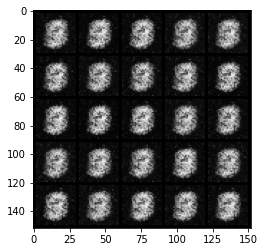

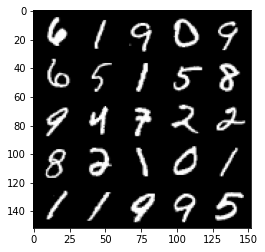

Epoch: 1 ended
Epoch: 2 started
Epoch: 2, step: 0, Mean Disc Loss: 0.2920660614073275, Mean Gen Loss: 1.7022820117473625


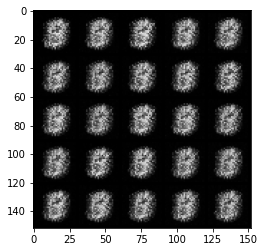

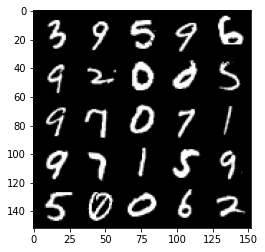

Epoch: 2 ended
Epoch: 3 started
Epoch: 3, step: 0, Mean Disc Loss: 0.1747729575037957, Mean Gen Loss: 1.9695349936485314


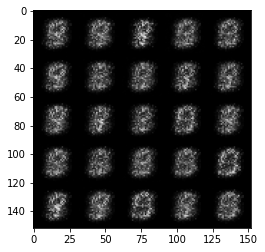

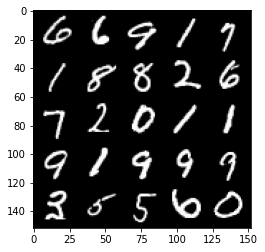

Epoch: 3 ended
Epoch: 4 started
Epoch: 4, step: 0, Mean Disc Loss: 0.22123157158494017, Mean Gen Loss: 1.6563131086826324


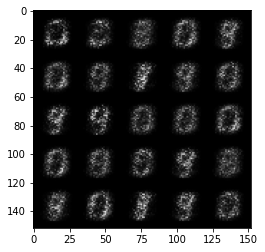

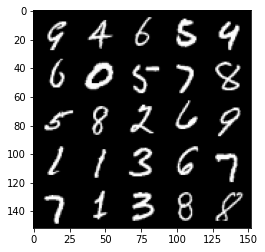

Epoch: 4 ended
Epoch: 5 started
Epoch: 5, step: 0, Mean Disc Loss: 0.21288788816332824, Mean Gen Loss: 1.6383496532440185


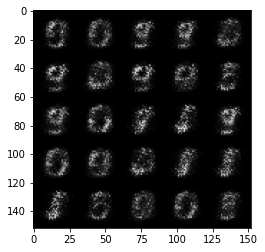

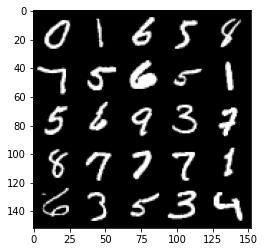

Epoch: 5 ended
Epoch: 6 started
Epoch: 6, step: 0, Mean Disc Loss: 0.17537009701132777, Mean Gen Loss: 1.9282462141513834


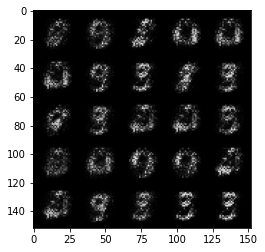

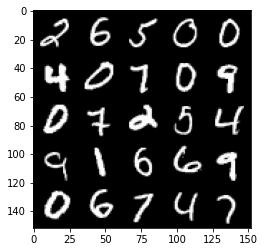

Epoch: 6 ended
Epoch: 7 started
Epoch: 7, step: 0, Mean Disc Loss: 0.11950877037644393, Mean Gen Loss: 2.444730177402498


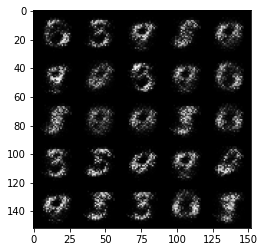

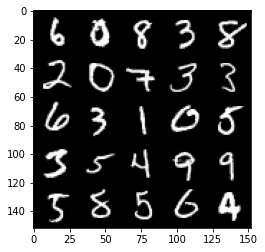

Epoch: 7 ended
Epoch: 8 started
Epoch: 8, step: 0, Mean Disc Loss: 0.11803559777140611, Mean Gen Loss: 2.746314707756043


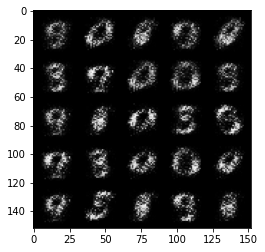

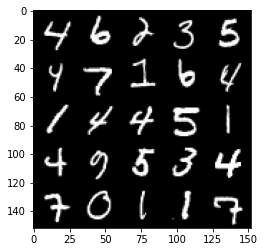

Epoch: 8 ended
Epoch: 9 started
Epoch: 9, step: 0, Mean Disc Loss: 0.10885139591991896, Mean Gen Loss: 3.0108346676826527


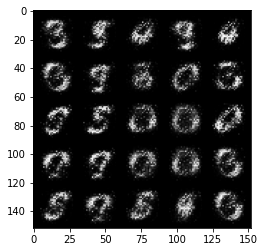

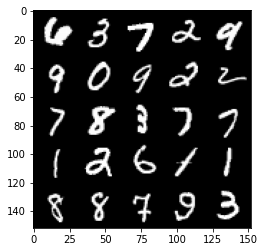

Epoch: 9 ended
Epoch: 10 started
Epoch: 10, step: 0, Mean Disc Loss: 0.09130887835472816, Mean Gen Loss: 3.373947241783143


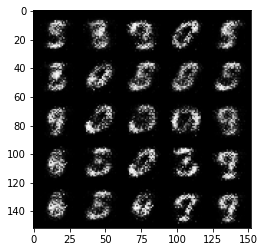

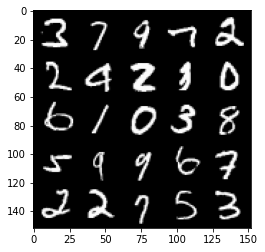

Epoch: 10 ended
Epoch: 11 started
Epoch: 11, step: 0, Mean Disc Loss: 0.076722036421299, Mean Gen Loss: 3.637063642978668


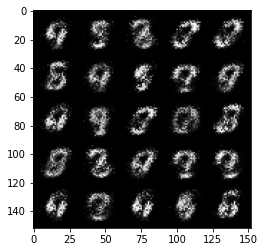

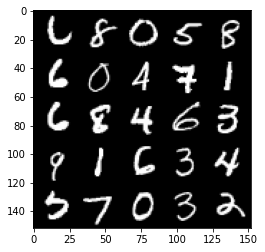

Epoch: 11 ended
Epoch: 12 started
Epoch: 12, step: 0, Mean Disc Loss: 0.07497949072718627, Mean Gen Loss: 3.670141478538513


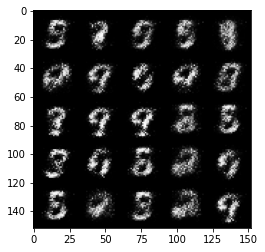

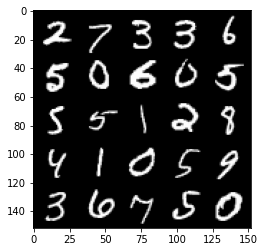

Epoch: 12 ended
Epoch: 13 started
Epoch: 13, step: 0, Mean Disc Loss: 0.06954735112190248, Mean Gen Loss: 3.7845874781608586


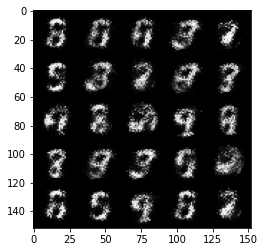

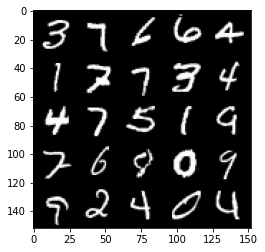

Epoch: 13 ended
Epoch: 14 started
Epoch: 14, step: 0, Mean Disc Loss: 0.05120953616127375, Mean Gen Loss: 4.038293438434599


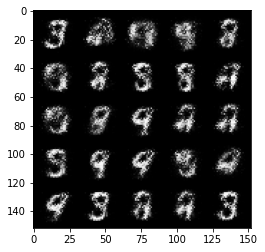

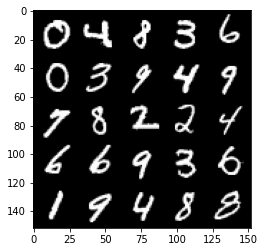

Epoch: 14 ended
Epoch: 15 started
Epoch: 15, step: 0, Mean Disc Loss: 0.06261929937452079, Mean Gen Loss: 3.877601064205167


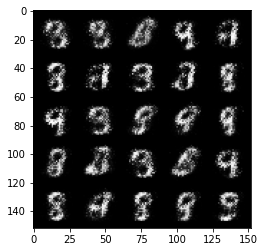

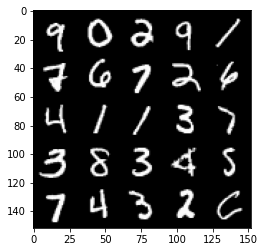

Epoch: 15 ended
Epoch: 16 started
Epoch: 16 ended
Epoch: 17 started
Epoch: 17, step: 0, Mean Disc Loss: 0.05794531832635401, Mean Gen Loss: 4.0783316788673405


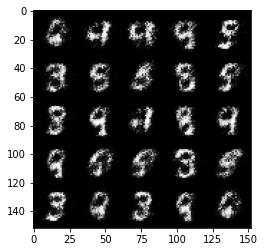

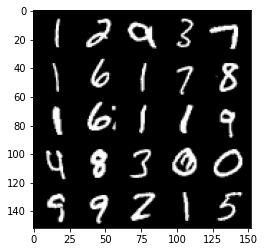

Epoch: 17 ended
Epoch: 18 started
Epoch: 18, step: 0, Mean Disc Loss: 0.053528013389557545, Mean Gen Loss: 4.202868036746979


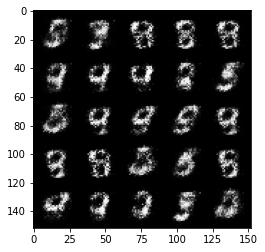

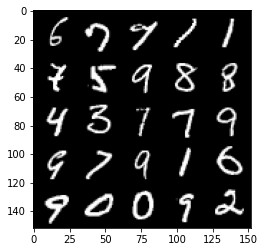

Epoch: 18 ended
Epoch: 19 started
Epoch: 19, step: 0, Mean Disc Loss: 0.05383195482194423, Mean Gen Loss: 4.332524837493897


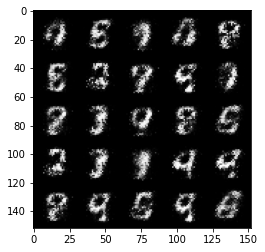

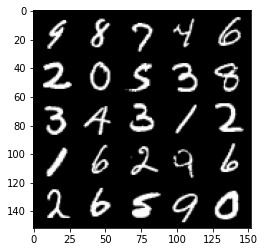

Epoch: 19 ended
Epoch: 20 started
Epoch: 20, step: 0, Mean Disc Loss: 0.05361018434911972, Mean Gen Loss: 4.170351926803588


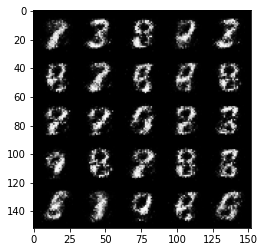

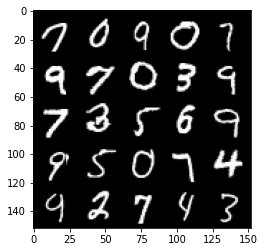

Epoch: 20 ended
Epoch: 21 started
Epoch: 21, step: 0, Mean Disc Loss: 0.06181646217405794, Mean Gen Loss: 4.185052280426026


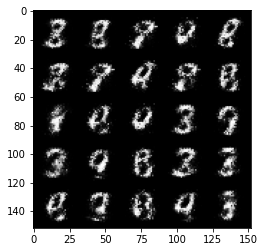

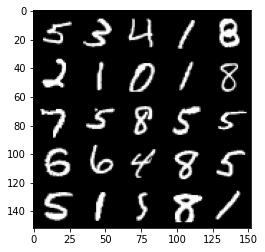

Epoch: 21 ended
Epoch: 22 started
Epoch: 22, step: 0, Mean Disc Loss: 0.05576807350292802, Mean Gen Loss: 4.1958722109794575


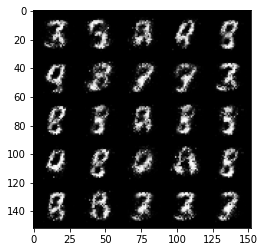

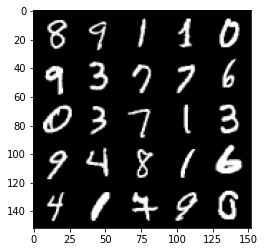

Epoch: 22 ended
Epoch: 23 started
Epoch: 23, step: 0, Mean Disc Loss: 0.07264782150834802, Mean Gen Loss: 4.05016508817673


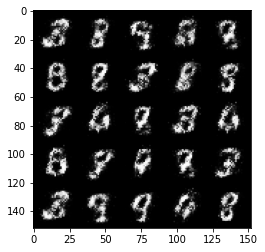

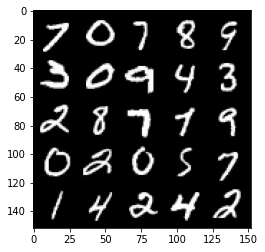

Epoch: 23 ended
Epoch: 24 started
Epoch: 24, step: 0, Mean Disc Loss: 0.07078918545693155, Mean Gen Loss: 4.242530994415283


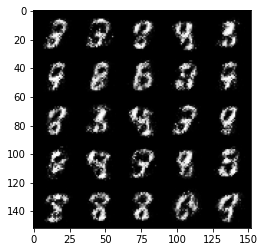

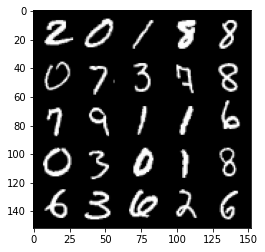

Epoch: 24 ended
Epoch: 25 started
Epoch: 25, step: 0, Mean Disc Loss: 0.08181339730322364, Mean Gen Loss: 4.035055506706237


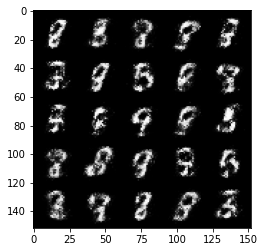

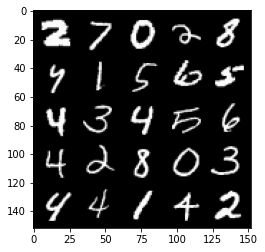

Epoch: 25 ended
Epoch: 26 started
Epoch: 26, step: 0, Mean Disc Loss: 0.08750602371990679, Mean Gen Loss: 3.890765358924866


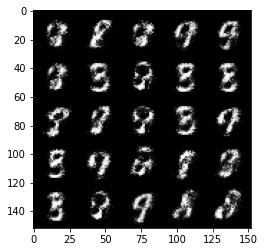

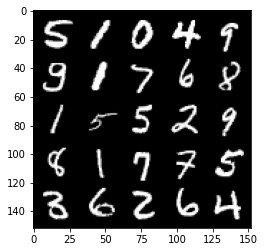

Epoch: 26 ended
Epoch: 27 started
Epoch: 27, step: 0, Mean Disc Loss: 0.08592614857107402, Mean Gen Loss: 3.940731786727906


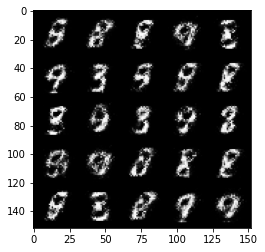

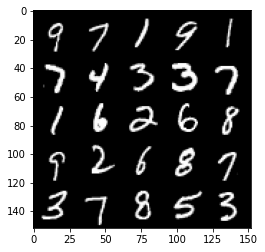

Epoch: 27 ended
Epoch: 28 started
Epoch: 28, step: 0, Mean Disc Loss: 0.09173992387950423, Mean Gen Loss: 4.0861159973144545


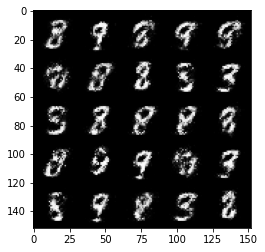

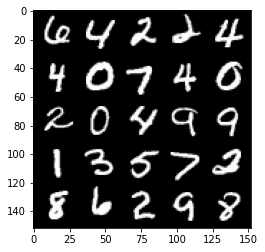

Epoch: 28 ended
Epoch: 29 started
Epoch: 29, step: 0, Mean Disc Loss: 0.09702247282117603, Mean Gen Loss: 3.8880379014015225


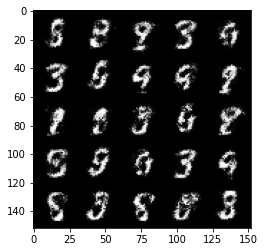

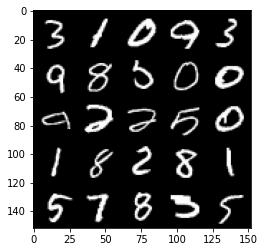

Epoch: 29 ended
Epoch: 30 started
Epoch: 30, step: 0, Mean Disc Loss: 0.09463793233036998, Mean Gen Loss: 3.894132160186768


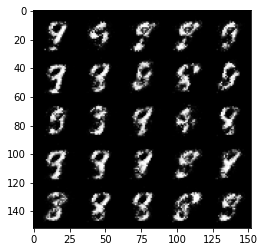

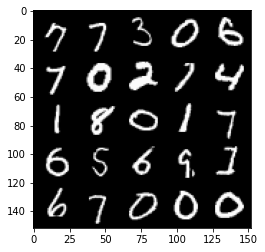

Epoch: 30 ended
Epoch: 31 started
Epoch: 31, step: 0, Mean Disc Loss: 0.11696447934210305, Mean Gen Loss: 3.6831197352409344


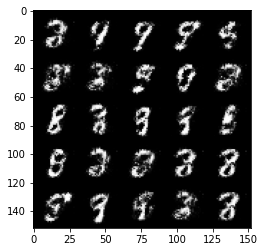

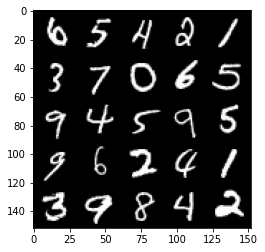

Epoch: 31 ended
Epoch: 32 started


In [ ]:
tot_gen_loss = 0.0
tot_disc_loss = 0.0

gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

gen_opt = torch.optim.Adam(gen.parameters(), lr = lr)
disc_opt = torch.optim.Adam(disc.parameters(), lr = lr)


curr_step = 0

mean_disc_loss = 0
mean_gen_loss = 0

for epoch in range(n_epochs):
  print(f"Epoch: {epoch} started")

  for (real, _) in dataloader:

    real = real.view(-1, 784).to(device)


    cur_batch_size = real.shape[0]

    disc.zero_grad()
    disc_loss = get_disc_loss(gen, disc, criterion, cur_batch_size, real, z_dim, device)
    disc_loss.backward()
    disc_opt.step()

    mean_disc_loss += disc_loss.mean().item() / display_step

    gen.zero_grad()
    gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
    gen_loss.backward()
    gen_opt.step()

    mean_gen_loss += gen_loss.mean().item() / display_step

    if curr_step % display_step == 0 and curr_step > 0:
      print(f"Epoch: {epoch}, step: {currStep}, Mean Disc Loss: {mean_disc_loss}, Mean Gen Loss: {mean_gen_loss}")
      fake_noise = get_noise(cur_batch_size, z_dim, device=device)
      fake = gen(fake_noise)
      show_tensor_images(fake)
      show_tensor_images(real)
      mean_disc_loss = 0
      mean_gen_loss = 0


    curr_step += 1

  
  print(f"Epoch: {epoch} ended")
